# Beam generator description  


## Inverse cdf approach
For a given probability density function $f(x)$ lcode2dPy.beam_generator.beam_generator uses the inverse cumulative destribution function (percent point function) $F^{-1}(p)$, where $F(x) = \int_{-\infty}^{x} f(t)dt$ and $p \in (0, 1)$, to generate extremely smooth and reproducible particle distributions. The function $F^{-1}(p)$ gives you the coordinate $x$ of a particle that corresponds to the value $p$ of the monotonous cumulative denstribution function. The main feature of this function is that it assigns to a uniformely distributed array of $p$ an array of $x$ distributed accordingly to $f(x)$.

In [1]:
from lcode2dPy.beam_generator.beam_profiles import SmoothDistr, StepwiseXiDistr, RejectSamplDistr
from lcode2dPy.config.default_config import default_config
import numpy as np
from numpy import cos, exp, pi, sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np

(-7.2, 3.2)

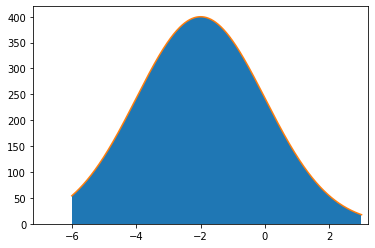

In [2]:
config = default_config
config.set('xi-step', 0.01)
config.set('window-length', 7)
dxi = config.getfloat('xi-step')
window_length = config.getfloat('window-length')

partic_in_layer = 400
sigma = 2
vmin, vmax = -6, 3
center = -2
distr = stats.norm
amp = 1

distr_gen = SmoothDistr(distr, vmin, vmax, center, sigma, xi_max=center, amp=amp)
beam = distr_gen(partic_in_layer, dxi)
layers_borders = np.arange(vmax, -window_length - dxi, -dxi)

plt.hist(beam, bins=layers_borders[::-1], density=False);
x = np.linspace(vmin, vmax, 1000)
y = distr_gen.f(x) / distr_gen.f(center) * partic_in_layer
plt.plot(x, y)
plt.xlim(-window_length - 0.2, vmax + 0.2)

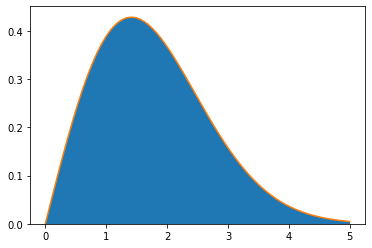

In [3]:
config = default_config
config.set('r-step', 0.01)
dr = config.getfloat('r-step')
window_width = config.getfloat('window-width')

N = 200000
sigma = 2
vmin, vmax = 0, window_width
center = 0
distr = stats.weibull_min
amp = 1

distr_gen = SmoothDistr(distr, vmin, vmax, 2, center, sigma)
beam = distr_gen(N)
layers_borders = np.arange(0, window_width + dr, dr)

plt.hist(beam, bins=layers_borders, density=True);
x = np.linspace(vmin, vmax, 1000)
y = distr_gen.f(x)
plt.plot(x, y)

## Stepwise profile approach
This approach works for any pdf $f(x)$. The algorithm adapts to the simulation grid and divides the beam on layers along the $\xi$ axis. Given the number of particles $N_{max}$ in the layer including the maximum of the pdf, we get the stepwise function $N(\xi)$. Then for a layer with the borders $(\xi_i, \xi_i + d\xi)$ we generate the uniform particle distribution with the total number of particles $N(\xi + d\xi/2)$.

(-7.2, 3.2)

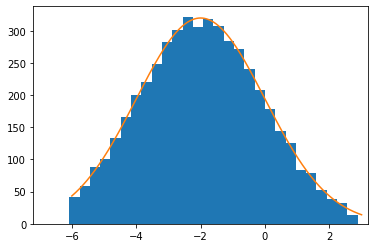

In [4]:
config = default_config
config.set('window-length', 7)
dxi = default_config.getfloat('xi-step')*40
window_length = default_config.getfloat('window-length')
partic_in_layer = 400

sigma = 2
center = -2
vmin, vmax = -6, 3 
xi_max = center
gauss = lambda x: 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-center)**2 / 2 / sigma**2) 
current_profile = gauss


xi_distr = StepwiseXiDistr(current_profile, center, vmin, vmax)
xis = xi_distr(partic_in_layer, dxi)
dxi = dxi * 0.8
layers_borders = np.arange(vmax//dxi*dxi, -window_length - dxi, -dxi)    
plt.hist(xis, bins=layers_borders[::-1]);
x = np.linspace(vmin, vmax, 1000)
plt.plot(x, [0.8*current_profile(xi)/xi_distr.f(xi_max)*partic_in_layer for xi in x])
plt.xlim(-window_length - 0.2, vmax + 0.2)

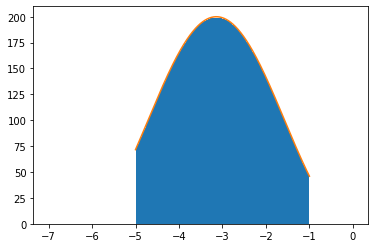

In [5]:
dxi = default_config.getfloat('xi-step')
window_length = default_config.getfloat('window-length')
partic_in_layer = 200

L = 2 * np.pi
center = -L/2
cosine = lambda x: 1/2 * (1 + np.cos(2 * np.pi * (x - center) / L)) if np.abs(x - center) <= L/2 else 0
current_profile = cosine
vmin, vmax = -5, -1
xi_max = center

xi_distr = StepwiseXiDistr(current_profile, center, vmin, vmax)
xis = xi_distr(partic_in_layer, dxi)

layers_borders = np.arange(0, -window_length - dxi, -dxi)    
plt.hist(xis, bins=layers_borders[::-1]);
x = np.linspace(vmin, vmax, 1000)
plt.plot(x, [current_profile(xi)/xi_distr.f(xi_max)*partic_in_layer for xi in x])
#plt.xlim(-2*np.pi, 0)

## Naive MC-like approach

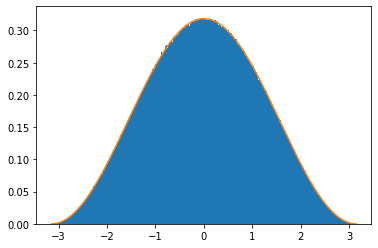

In [6]:
dxi = default_config.getfloat('xi-step')

L = 2 * np.pi
center = 0
vmin = -L/2
vmax = L/2
#cosine = lambda x: 1/2 * (1 + np.cos(2 * np.pi * (x - center) / L)) if np.abs(x - center) <= L/2 else 0
cosine = lambda x: 1/2 * (1 + np.cos(2 * np.pi * (x - center) / L))

distr_gen = RejectSamplDistr(cosine, center, vmin, vmax)
distr = distr_gen(1e7)
N_steps = int((vmax-vmin)//dxi) 
plt.hist(distr, N_steps, density=True);
x = np.linspace(vmin, vmax, 1000)
plt.plot(x, distr_gen.f(x)/np.pi)

(-7.2, 3.2)

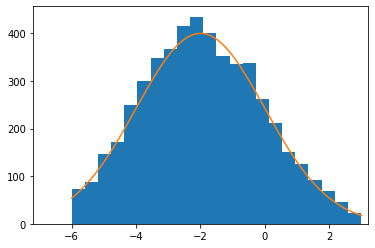

In [7]:
config = default_config
config.set('window-length', 7)
dxi = default_config.getfloat('xi-step')*40
window_length = default_config.getfloat('window-length')
partic_in_layer = 400

sigma = 2
center = -2
vmin, vmax = -6, 3 
xi_max = center
gauss = lambda x: 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-center)**2 / 2 / sigma**2) 
current_profile = gauss

distr_gen = RejectSamplDistr(current_profile, center, vmin, vmax)
distr = distr_gen(0.5e4)
N_steps = int((vmax-vmin)//dxi) 
plt.hist(distr, N_steps);
x = np.linspace(vmin, vmax, 1000)
plt.plot(x, distr_gen.f(x)/distr_gen.f(center) * 400)
plt.xlim(-window_length - 0.2, vmax + 0.2)

# Text beam profile parser

In [8]:
path = 'gorn/Active/CodesMerging/pparticles/lcode_c_sim/lcode.runas.cfg'


# Beam generation

In [9]:
from lcode2dPy.beam_generator.beam_generator import make_beam

In [10]:
config = default_config
window_width = config.getfloat('window-width')

center = 0
L = 2 * np.pi
sigma = 1
gamma = 426
energy_spread = 3e-4
angular_spread = 1e-5
q_m = 1
partic_in_layer = 200

cosine = lambda x: 1/2 * (1 + np.cos(2 * np.pi * (x - center) / L))
distrs = dict(
    xi = StepwiseXiDistr(cosine, 0, -L/2, L/2, amp=0.1),
    r = SmoothDistr(stats.weibull_min, 0, window_width, 2, 0, sigma),
    p_z = SmoothDistr(stats.norm, None, None, gamma, energy_spread),
    p_r = SmoothDistr(stats.norm, None, None, 0, gamma*angular_spread),
    M = SmoothDistr(stats.norm, None, None, 0, gamma*angular_spread)
)

beam = make_beam(config, distrs, q_m, partic_in_layer, 
                 savehead=False, saveto=False, name='beamfile.bin')

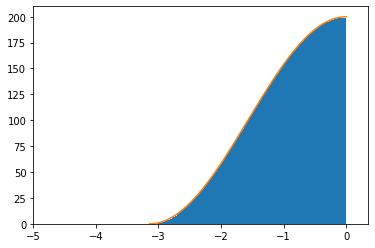

In [11]:
dxi = config.getfloat('xi-step')
window_length = config.getfloat('window-length')
layers_borders = np.arange(0, -window_length - dxi, -dxi)    
plt.hist(beam['xi'][:-1], bins=layers_borders[::-1]);
x = layers_borders[layers_borders > -L/2]
xi_distr = distrs['xi']
plt.plot(x, xi_distr.f(x) / xi_distr.f(xi_distr.max) * partic_in_layer)
plt.xlim(-5,);

In [12]:
beam

array([(-6.03363852e-05, 0.45163553, 426.00021166, -0.006282  , -1.76014763e-03, 1., 0.001,     0),
       (-1.12836496e-04, 0.79020174, 425.99993608,  0.002717  , -1.18556146e-03, 1., 0.001,     1),
       (-1.87935442e-04, 1.0423066 , 425.99994399,  0.00493274,  1.06455075e-02, 1., 0.001,     2),
       ...,
       (-2.98408011e+00, 0.13064229, 425.99993017, -0.00228901,  7.59367802e-04, 1., 0.001, 31257),
       (-2.99880870e+00, 0.06201741, 425.99989398, -0.00545708,  5.09887943e-05, 1., 0.001, 31258),
       (-1.00000000e+05, 0.        ,   0.        ,  0.        ,  0.00000000e+00, 1., 0.   ,     0)],
      dtype=[('xi', '<f8'), ('r', '<f8'), ('p_z', '<f8'), ('p_r', '<f8'), ('M', '<f8'), ('q_m', '<f8'), ('q_norm', '<f8'), ('id', '<i8')])

In [16]:
particle_dtype2d = np.dtype([('xi', 'f8'), ('r', 'f8'),
                             ('p_z', 'f8'), ('p_r', 'f8'), ('M', 'f8'),
                             ('q_m', 'f8'), ('q_norm', 'f8'), ('id', 'i8')])

particle_dtype3d = np.dtype([('xi', 'f8'), ('x', 'f8'), ('y', 'f8'),
                             ('px', 'f8'), ('py', 'f8'), ('pz', 'f8'),
                             ('q_m', 'f8'), ('q_norm', 'f8'), ('id', 'i8')])

geom_to_particle_dtype = {'c': particle_dtype2d, 
                          'circ': particle_dtype2d,
                          '3d': particle_dtype3d}
geom_to_distr_list = {
    'circ':['xi', 'r', 'p_z', 'p_r', 'M'],
    'c':   ['xi', 'r', 'p_z', 'p_r', 'M'],
    'p':   ['xi', 'x', 'p_x', 'p_z', 'M'],
    '3d':  ['xi', 'x', 'y', 'px', 'py', 'pz'],
}

In [101]:
def make_beam(config, distrs, q_m=1.0, partic_in_layer=200, identifier=0,
              savehead=False, saveto=False, name='beamfile.bin'):
        if saveto and name in os.listdir(saveto):
            raise Exception(
            """Another beamfile with the same name is found.
            You may delete it using the following command:
            "rm %s".""" % os.path.join(saveto, name)
            )
        
        geom = config.get('geometry')
        distr_list = geom_to_distr_list[geom]
        particle_dtype  = geom_to_particle_dtype[geom]
        
        ##### xi-distribution generation ######
        xi_distr = distrs[distr_list[0]]
        xi_step = config.getfloat('xi-step')
        q = 2. * xi_distr.amp / partic_in_layer
        xi = xi_distr(partic_in_layer, xi_step)
        
        if savehead: # beam cut
            cond = xi >= -config.getfloat('window-length')
        else:
            cond = (xi >= -config.getfloat('window-length')) & (xi <= 0)
        xi = xi[cond]
        partic_num = xi.size    
        xi = np.sort(xi)[::-1]
        
        particles = np.zeros(partic_num + 1, dtype=particle_dtype)
        particles['xi'][:partic_num] = xi
        
        ##### other distributions generation ######
        for distr_name in distr_list[1:]:
            particles[distr_name][:partic_num] = distrs[distr_name](partic_num)
            np.random.shuffle(particles[distr_name][:partic_num])
        
        if geom == 'c' or geom == 'circ':
            particles['M'][:partic_num] = particles['M'][:partic_num] * particles['r'][:partic_num]
        
        ##### beam construction ######
        particles['q_m'][:partic_num] = q_m * np.ones(partic_num)
        particles['q_norm'][:partic_num] = q * np.ones(partic_num)
        particles['id'][:partic_num] = np.arange(partic_num, dtype=int) + int(identifier) * int(1e12)
#         stub_particle = np.array([[-100000., 0., 0., 0., 0., 0., 1.0, 0., 0.]])
        particles['xi'][-1] = -100000.
        particles['q_m'][-1] = 1.
        
        ##### saving data ######
        beam = particles[particles['xi'] <= 0]
        if saveto:
            beam.values.tofile(os.path.join(saveto, name))
        if savehead:
            head = particles[particles['xi'] > 0]
            head.values.tofile(os.path.join(saveto, 'head-' + name))
        return beam